In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('adult_csv.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
0,2,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2,United-States,<=50K
1,3,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,United-States,<=50K
2,2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,2,United-States,<=50K
3,3,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,2,United-States,<=50K
4,1,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,2,Cuba,<=50K


Имеются данные adult.csv (см. в материалах к занятию).
Целевой переменной является уровень дохода income (крайний правый столбец).
Описание признаков можно найти по ссылке www.cs.toronto.edu...etail.html
Вам необходимо построить модели логистической регрессии и SVM, которые предсказывает уровень дохода человека.
Вывести качество полученных моделей на тестовой выборке, используя функцию score у модели.

In [4]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capitalgain', 'capitalloss', 'hoursperweek', 'native-country',
       'class'],
      dtype='object')

In [5]:
df['education'].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capitalgain     48842 non-null  int64 
 11  capitalloss     48842 non-null  int64 
 12  hoursperweek    48842 non-null  int64 
 13  native-country  47985 non-null  object
 14  class           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [7]:
df.dropna(inplace = True)

In [8]:
X = df.drop('class', axis=1)

In [9]:
X = pd.get_dummies(X,
                   columns = ['workclass',
                              'education',
                              'marital-status',
                              'occupation',
                              'relationship',
                              'race',
                              'sex',
                              'native-country'])

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [11]:
le.fit(df['class'])
y = le.transform(df['class'])
le.classes_

array(['<=50K', '>50K'], dtype=object)

In [12]:
X.shape

(45222, 104)

In [19]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

In [20]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [21]:
def feat_ext(model, X, y):
    # feature extraction
    
    rfe = RFE(model, n_features_to_select=1)
    fit = rfe.fit(X, y)
    print("Feature Ranking: %s" % fit.ranking_)
    
    return fit.ranking_

In [22]:
def model_score(model, X, y, rank, number):
    mylist = []
    for item in range(1,X.shape[1]):
        
        if (number != 0) & (number != item):
            continue

        #выбираем независимые переменные
        mask = rank<=item
        X1 = pd.DataFrame(X).loc[:, mask]

        X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=42)
        model.fit(X_train, y_train)
        score = model.score(X_train, y_train) 

        mylist.append([item, score])
        
    return mylist

In [23]:
model = LogisticRegression(max_iter=1000)

In [24]:
rank = feat_ext(model, X, y)

Feature Ranking: [  9  34   2   3  12   6  25  36  26  27  52  51  83  43  39  50  49  48
  44  46  91  99  41  42  45  40  47  38  90   4  53  21  16   1  11  13
  79 102 101  15  14  18  24  10  23  22  32  33  31  70  19  30  20   5
  54   8  55  59  35  98  97   7  17  72  57  78  28  69  74  92  82  61
  65  66  96  84  67  71 103  88  89  87 104  64  60  68  94  73  29  86
  85  80  63 100  62  95  77  37  93  81  75  58  56  76]


In [25]:
mylist = model_score(model, X, y, rank,0)

In [26]:
import matplotlib.pyplot as plt

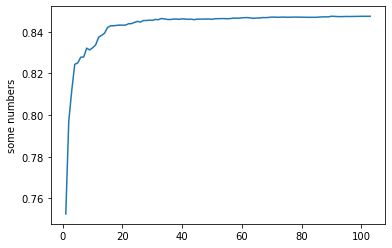

In [27]:
df_score = pd.DataFrame(mylist)
plt.plot(df_score[0],df_score[1])
plt.ylabel('some numbers')
plt.show()

In [28]:
mylist[:20]

[[1, 0.7525193492339283],
 [2, 0.7971568472595166],
 [3, 0.8118464697520139],
 [4, 0.8243563418101406],
 [5, 0.824988153530248],
 [6, 0.8277365345127152],
 [7, 0.8278628968567366],
 [8, 0.8320960353814564],
 [9, 0.8312430895593114],
 [10, 0.8322855788974886],
 [11, 0.8336439740957194],
 [12, 0.8373400726583479],
 [13, 0.8382246090664982],
 [14, 0.8392986889906808],
 [15, 0.8420154793871426],
 [16, 0.8428368346232823],
 [17, 0.8428368346232823],
 [18, 0.8430263781393145],
 [19, 0.8431843310693413],
 [20, 0.8431211498973306]]

In [29]:
#оставим 15 параметров
#LogisticRegression
model_score(model, X, y, rank,15)

[[15, 0.8420154793871426]]

In [30]:
#SVC
from sklearn.svm import SVC
model = SVC(kernel="linear")
model_score(model, X, y, rank,15)

[[15, 0.8419207076291265]]